# Introducción 

De las multiples paltaformas que permiten usar Python y R se elige Anaconda. Esta trae por defecto una versión predeterminada para usar python en Spider o Jupyter que son los entornos de trabajo o bien ya sea R que también se puede descargar directamente de Anaconda.

https://www.anaconda.com/products/individual

Es es el enlace donde pueden descargar anaconda 

https://www.youtube.com/watch?v=OmmklYlRGzo

El link del video explica como es su instalación 

# Python como lenguaje de programación

Se decide tomar la opción de usar python como lenguaje de programación para desarrollar el problema que esta teniendo CottonPlus Inc, pues es un software de codigo libre, donde toda una comunidad puede hacer uso de él. 

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import math

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

# Estilos de las gráfica
plt.style.use('bmh') #makes plots look pretty

# Preprocesado y modelado
# Sklearn
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split, GridSearchCV, KFold, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, balanced_accuracy_score
from sklearn.metrics import recall_score, roc_curve, auc, roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_moons
from sklearn import datasets
from sklearn.pipeline import make_pipeline

# Escalado de datos
from sklearn.preprocessing import scale

# Configuración ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import pingouin as pg #Correlación con intervalos de confianza
from scipy import stats
from scipy.stats import pearsonr
import scipy
import statsmodels.api as sm

Se importan las librerias que van a ser útiles para la elavoración de la solución de los objetivos.

In [2]:
data=pd.read_excel("Data DS Cotton Plus.xlsx") #leemos el documento  de Excel que contiene la información
#el codigo se debe de guardar en la carpeta que contenga el libro de Excel

In [3]:
data.head() #Se muestra los primeros 10

,Cedula,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,...,TelefonoOficina,Telefono Casa,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza
0,1,Nombre Cliente 1,Aficionados,Si,No,264800,2,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,0
1,2,Nombre Cliente 2,Esporádicos,Si,No,179900,1,0,0,11001,...,NaN,NaN,179900,0,0,0,0,0,0,0
2,3,Nombre Cliente 3,Aficionados,Si,No,189800,2,0,0,11101,...,NaN,NaN,451200,0,0,0,0,0,0,0
3,4,Nombre Cliente 4,Aficionados,Si,No,65900,1,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,1859600
4,5,Nombre Cliente 5,Aficionados,Si,No,238800,2,0,0,11101,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
data.info() #la información que contiene el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 40 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Cedula                                                            9976 non-null   int64  
 1   Nombre Completo                                                   9976 non-null   object 
 2   Segmento                                                          9976 non-null   object 
 3   Compro 2019?                                                      9976 non-null   object 
 4   Compro 2020?                                                      9976 non-null   object 
 5   Monto Comprado 2019?                                              9976 non-null   int64  
 6   Nro Transacciones 2019                                            9976 non-null   int64  
 7   Monto Comprado 2020              

In [5]:
data.shape # Identificar cuantas filas y columnas se presentan.

(9976, 40)

In [6]:
data.columns.values #Puedo ver el nombre de las columnas

array(['Cedula', 'Nombre Completo', 'Segmento', 'Compro 2019?',
       'Compro 2020?', 'Monto Comprado 2019?', 'Nro Transacciones 2019',
       'Monto Comprado 2020', 'Nro Transacciones 2020',
       'Tipo de Contacto', 'Es Contactable', 'Ciudad de Residencia',
       'Mail', 'Direccion', 'Genero', 'Estado Civil', 'Fecha Nacimiento',
       'Mes Nacimiento', 'Dia Nacimiento', 'Edad',
       'Monto Total de ultima compra', 'Cantidad Articulos',
       'Recencia (Tiempo transcurrido en semanas desde su ultima compra)',
       'Frecuencia (Cantidad items comprados)', 'Direccion Valido?',
       'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?',
       'Tel Casa Valido?', 'Telefono Movil', 'TelefonoOficina',
       'Telefono Casa', 'Monto - MARCA COTTON- B/quilla.',
       'Monto - Brand Store Cucuta', 'Monto - MARCA COTTON- Bucaramanga',
       'Monto - MARCA COTTON- Manizales', 'Monto - MARCA COTTON- Pereira',
       'Monto - MARCA COTTON- Cartagena', 'Monto - MARCA COTTON- Pasto',
       

In [7]:
data.describe().T # Valores numericos de la tabla con sus datos

,count,mean,std,min,25%,50%,75%,max
Cedula,9976.0,4.988500e+03,2.879967e+03,1.0,2494.75,4988.5,7482.25,9976.0
Monto Comprado 2019?,9976.0,2.438670e+05,4.564346e+05,0.0,0.00,113485.0,288625.00,9231860.0
Nro Transacciones 2019,9976.0,2.462711e+00,4.698831e+00,0.0,0.00,1.0,3.00,92.0
Monto Comprado 2020,9976.0,2.506701e+04,1.322477e+05,0.0,0.00,0.0,0.00,6448400.0
Nro Transacciones 2020,9976.0,2.635325e-01,1.287152e+00,0.0,0.00,0.0,0.00,60.0
Tipo de Contacto,9976.0,9.268515e+03,3.745491e+03,1.0,10101.00,11100.0,11101.00,11101.0
Mail,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Direccion,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fecha Nacimiento,9976.0,1.955487e+07,1.698869e+06,0.0,19660930.00,19790608.5,19850921.25,20001020.0
Dia Nacimiento,9976.0,1.510876e+01,9.083942e+00,1.0,7.00,15.0,23.00,31.0


In [8]:
cols_categoricas = [i for i in data.columns if not i in data._get_numeric_data()]
print (cols_categoricas) #Muestra variables categoricas nombre de las columnas

['Nombre Completo', 'Segmento', 'Compro 2019?', 'Compro 2020?', 'Es Contactable', 'Ciudad de Residencia', 'Genero', 'Estado Civil', 'Mes Nacimiento', 'Direccion Valido?', 'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?', 'Tel Casa Valido?']


In [9]:
for i in cols_categoricas:
  print (f"{i} ---->  {data[f'{i}'].unique()} \n") #puedo ver que contiene cada una de las variables 

Nombre Completo ---->  ['Nombre Cliente 1' 'Nombre Cliente 2' 'Nombre Cliente 3' ...
 'Nombre Cliente 9974' 'Nombre Cliente 9975' 'Nombre Cliente 9976'] 

Segmento ---->  ['Aficionados' 'Esporádicos' 'Curiosos' 'Inactivo' 'Adictos'] 

Compro 2019? ---->  ['Si' 'No'] 

Compro 2020? ---->  ['No' 'Si'] 

Es Contactable ---->  ['Si'] 

Ciudad de Residencia ---->  ['BUCARAMANGA' 'BARRANQUILLA' 'MANIZALES' 'FLORIDABLANCA' 'BOGOTA'
 'MEDELLIN' 'CHINCHINA' 'CALI' 'BARRANCABERMEJA' 'NEIRA' 'VILLAVICENCIO'
 'PEREIRA' 'CARTAGENA' 'ITAGUI' 'Sin especificar' 'BARANOA' 'PIEDECUESTA'
 'YOPAL' 'DUITAMA' 'TUNJA' 'SOGAMOSO' 'NEIVA' 'ARMENIA (QUINDIO)' 'PASTO'
 'PALESTINA (CALDAS)' 'VICTORIA' 'EL DONCELLO' 'VILLAMARIA' 'SALAMINA'
 'SANTA ROSA DE CABAL' 'POPAYAN' 'SANTIAGO (PUTUMAYO)' 'CUCUTA'
 'BARBOSA (SANTANDER)' 'IBAGUE' 'FRESNO' 'LA UNION (VALLE)' 'BUENAVENTURA'
 'LA VICTORIA (VALLE)' 'CARTAGO' 'SAN CARLOS (CORDOBA)' 'MONTERIA'
 'TURMEQUE' 'LORICA' 'CERETE' 'VALLEDUPAR' 'ARMENIA (ANT)' 'SANTA MARTA'


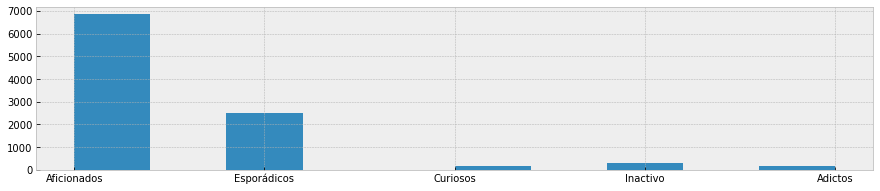

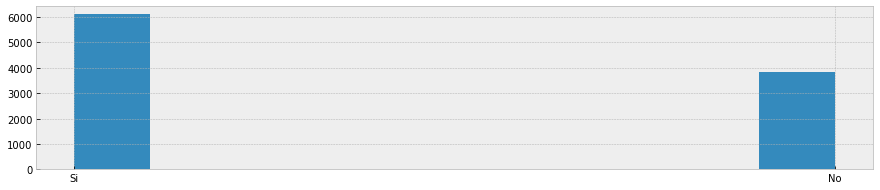

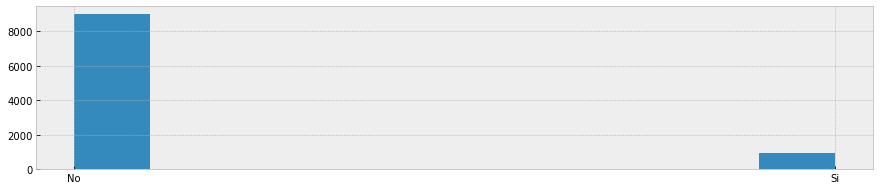

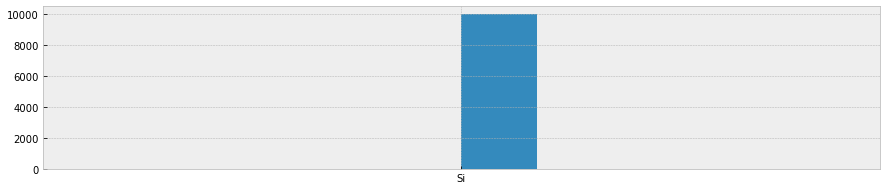

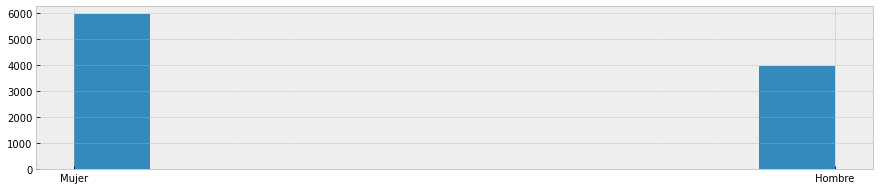

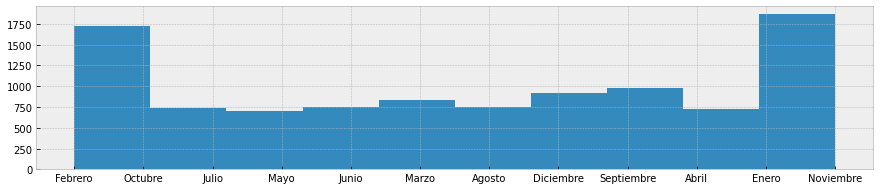

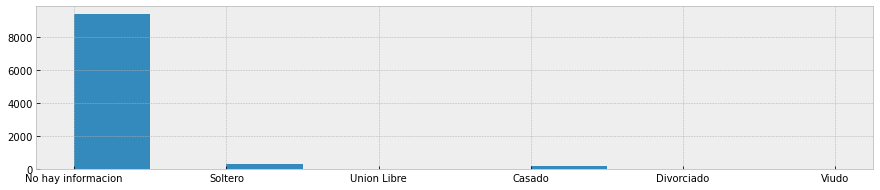

In [10]:
#cols_plt = [i for i in data.columns if not i in data._get_numeric_data()]
cols_plt = ['Segmento','Compro 2019?','Compro 2020?','Es Contactable',
            'Genero', 'Mes Nacimiento','Estado Civil']

for i in cols_plt: #recorrer el vector cols_plt para graficar la cantidad de variables 
  plt.figure(figsize=(15,3))
  plt.hist(data[i])
  plt.show()

<AxesSubplot:xlabel='Segmento', ylabel='Edad'>

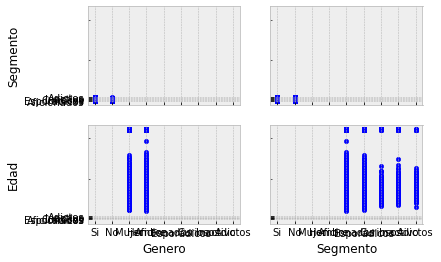

In [11]:
figure, axs = plt.subplots(2,2, sharey = True, sharex = True )
data.plot(kind="scatter", x='Compro 2019?', y='Segmento', ax=axs[0][0] )
data.plot(kind="scatter", x='Compro 2020?', y='Segmento', ax=axs[0][1] )
data.plot(kind="scatter", x='Genero', y='Edad', ax=axs[1][0] )
data.plot(kind="scatter", x='Segmento', y='Edad', ax=axs[1][1] )

Text(0.5, 1.0, 'Usuarios vs Edad')

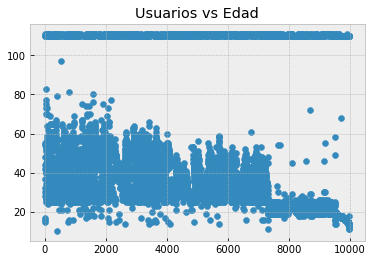

In [12]:
plt.scatter(data['Cedula'],data['Edad'])
plt.title("Usuarios vs Edad")

Text(0.5, 1.0, 'Edad vs Genero')

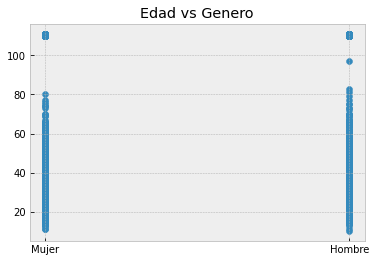

In [13]:
plt.scatter(data['Genero'],data['Edad'])
plt.title("Edad vs Genero")

Text(0.5, 1.0, 'Edad vs Segmentos')

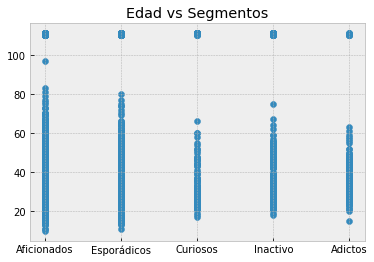

In [14]:
plt.scatter(data['Segmento'],data['Edad'])
plt.title("Edad vs Segmentos")

Text(0.5, 1.0, 'Ciudad de Residencia vs Compras')

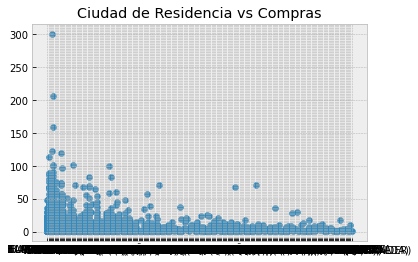

In [15]:
plt.scatter(data['Ciudad de Residencia'],data['Frecuencia (Cantidad items comprados)'])
plt.title("Ciudad de Residencia vs Compras")

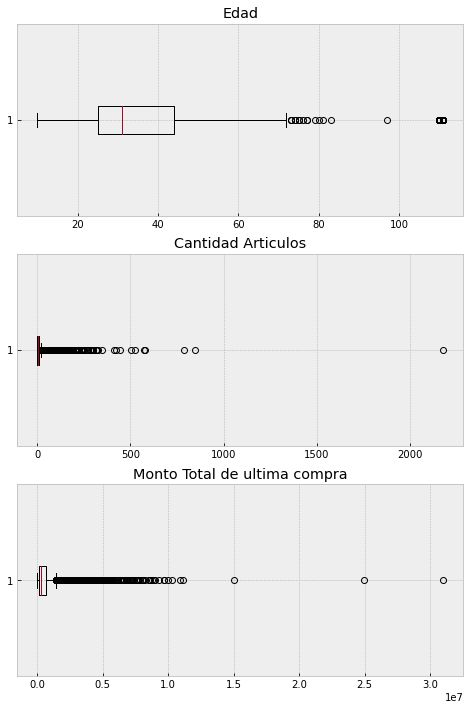

In [16]:
## Boxplots

f_dims = (8, 12)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=f_dims)

ax1.boxplot(x=data['Edad'], vert=False)
ax1.set_title(label='Edad')

ax2.boxplot(x=data['Cantidad Articulos'], vert=False)
ax2.set_title(label='Cantidad Articulos')

ax3.boxplot(x=data['Monto Total de ultima compra'], vert=False)
ax3.set_title(label='Monto Total de ultima compra')

plt.show()

In [17]:
n_ciudad = data.groupby(data["Ciudad de Residencia"]).Cedula.count()

In [18]:
max(n_ciudad)

2075

In [19]:
min(n_ciudad)

1

In [20]:
n_ciudad.describe().T

count     251.00000
mean       39.74502
std       185.57922
min         1.00000
25%         1.00000
50%         2.00000
75%         5.00000
max      2075.00000
Name: Cedula, dtype: float64

In [21]:
n_ciudad

Ciudad de Residencia
ACACIAS       7
AGUACHICA     1
AGUADAS       2
AGUAZUL       3
ALMEIDA       1
             ..
YARUMAL       1
YOPAL        13
YUMBO         3
ZARZAL        4
ZIPAQUIRA     4
Name: Cedula, Length: 251, dtype: int64

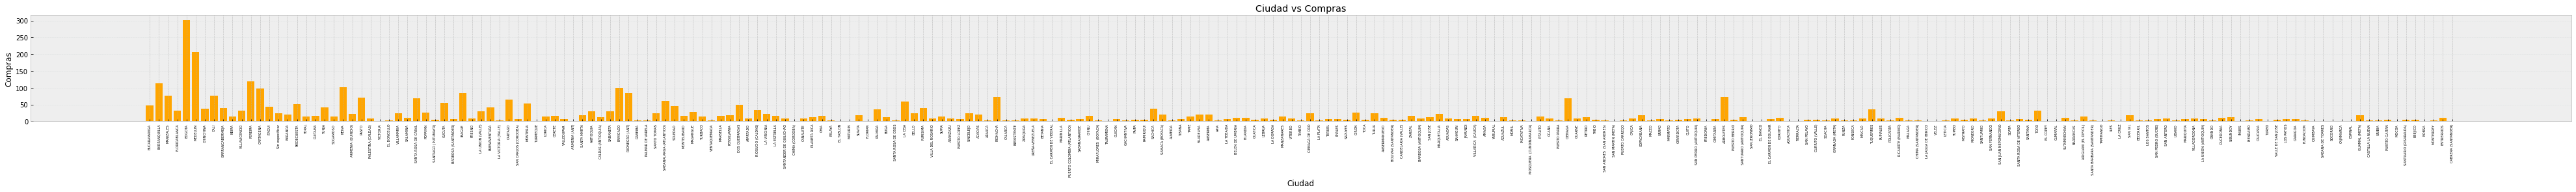

In [22]:
plt.figure(figsize=(70,3))
# Crea una figura de barras
plt.bar(x=data["Ciudad de Residencia"], height=data['Frecuencia (Cantidad items comprados)'], color='orange')

# Organizo las caracteristicas de la grafica 
plt.title('Ciudad vs Compras')
plt.xlabel('Ciudad')
plt.ylabel('Compras')
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.5, axis='y', alpha=0.2)
plt.xticks(rotation=90)
plt.xticks(fontsize=5)

# muestro la grafica
plt.show()

array([[<AxesSubplot:xlabel='Nro Transacciones 2019', ylabel='Nro Transacciones 2019'>,
        <AxesSubplot:xlabel='Nro Transacciones 2020', ylabel='Nro Transacciones 2019'>,
        <AxesSubplot:xlabel='Cantidad Articulos', ylabel='Nro Transacciones 2019'>,
        <AxesSubplot:xlabel='Recencia (Tiempo transcurrido en semanas desde su ultima compra)', ylabel='Nro Transacciones 2019'>,
        <AxesSubplot:xlabel='Frecuencia (Cantidad items comprados)', ylabel='Nro Transacciones 2019'>],
       [<AxesSubplot:xlabel='Nro Transacciones 2019', ylabel='Nro Transacciones 2020'>,
        <AxesSubplot:xlabel='Nro Transacciones 2020', ylabel='Nro Transacciones 2020'>,
        <AxesSubplot:xlabel='Cantidad Articulos', ylabel='Nro Transacciones 2020'>,
        <AxesSubplot:xlabel='Recencia (Tiempo transcurrido en semanas desde su ultima compra)', ylabel='Nro Transacciones 2020'>,
        <AxesSubplot:xlabel='Frecuencia (Cantidad items comprados)', ylabel='Nro Transacciones 2020'>],
       [<Axe

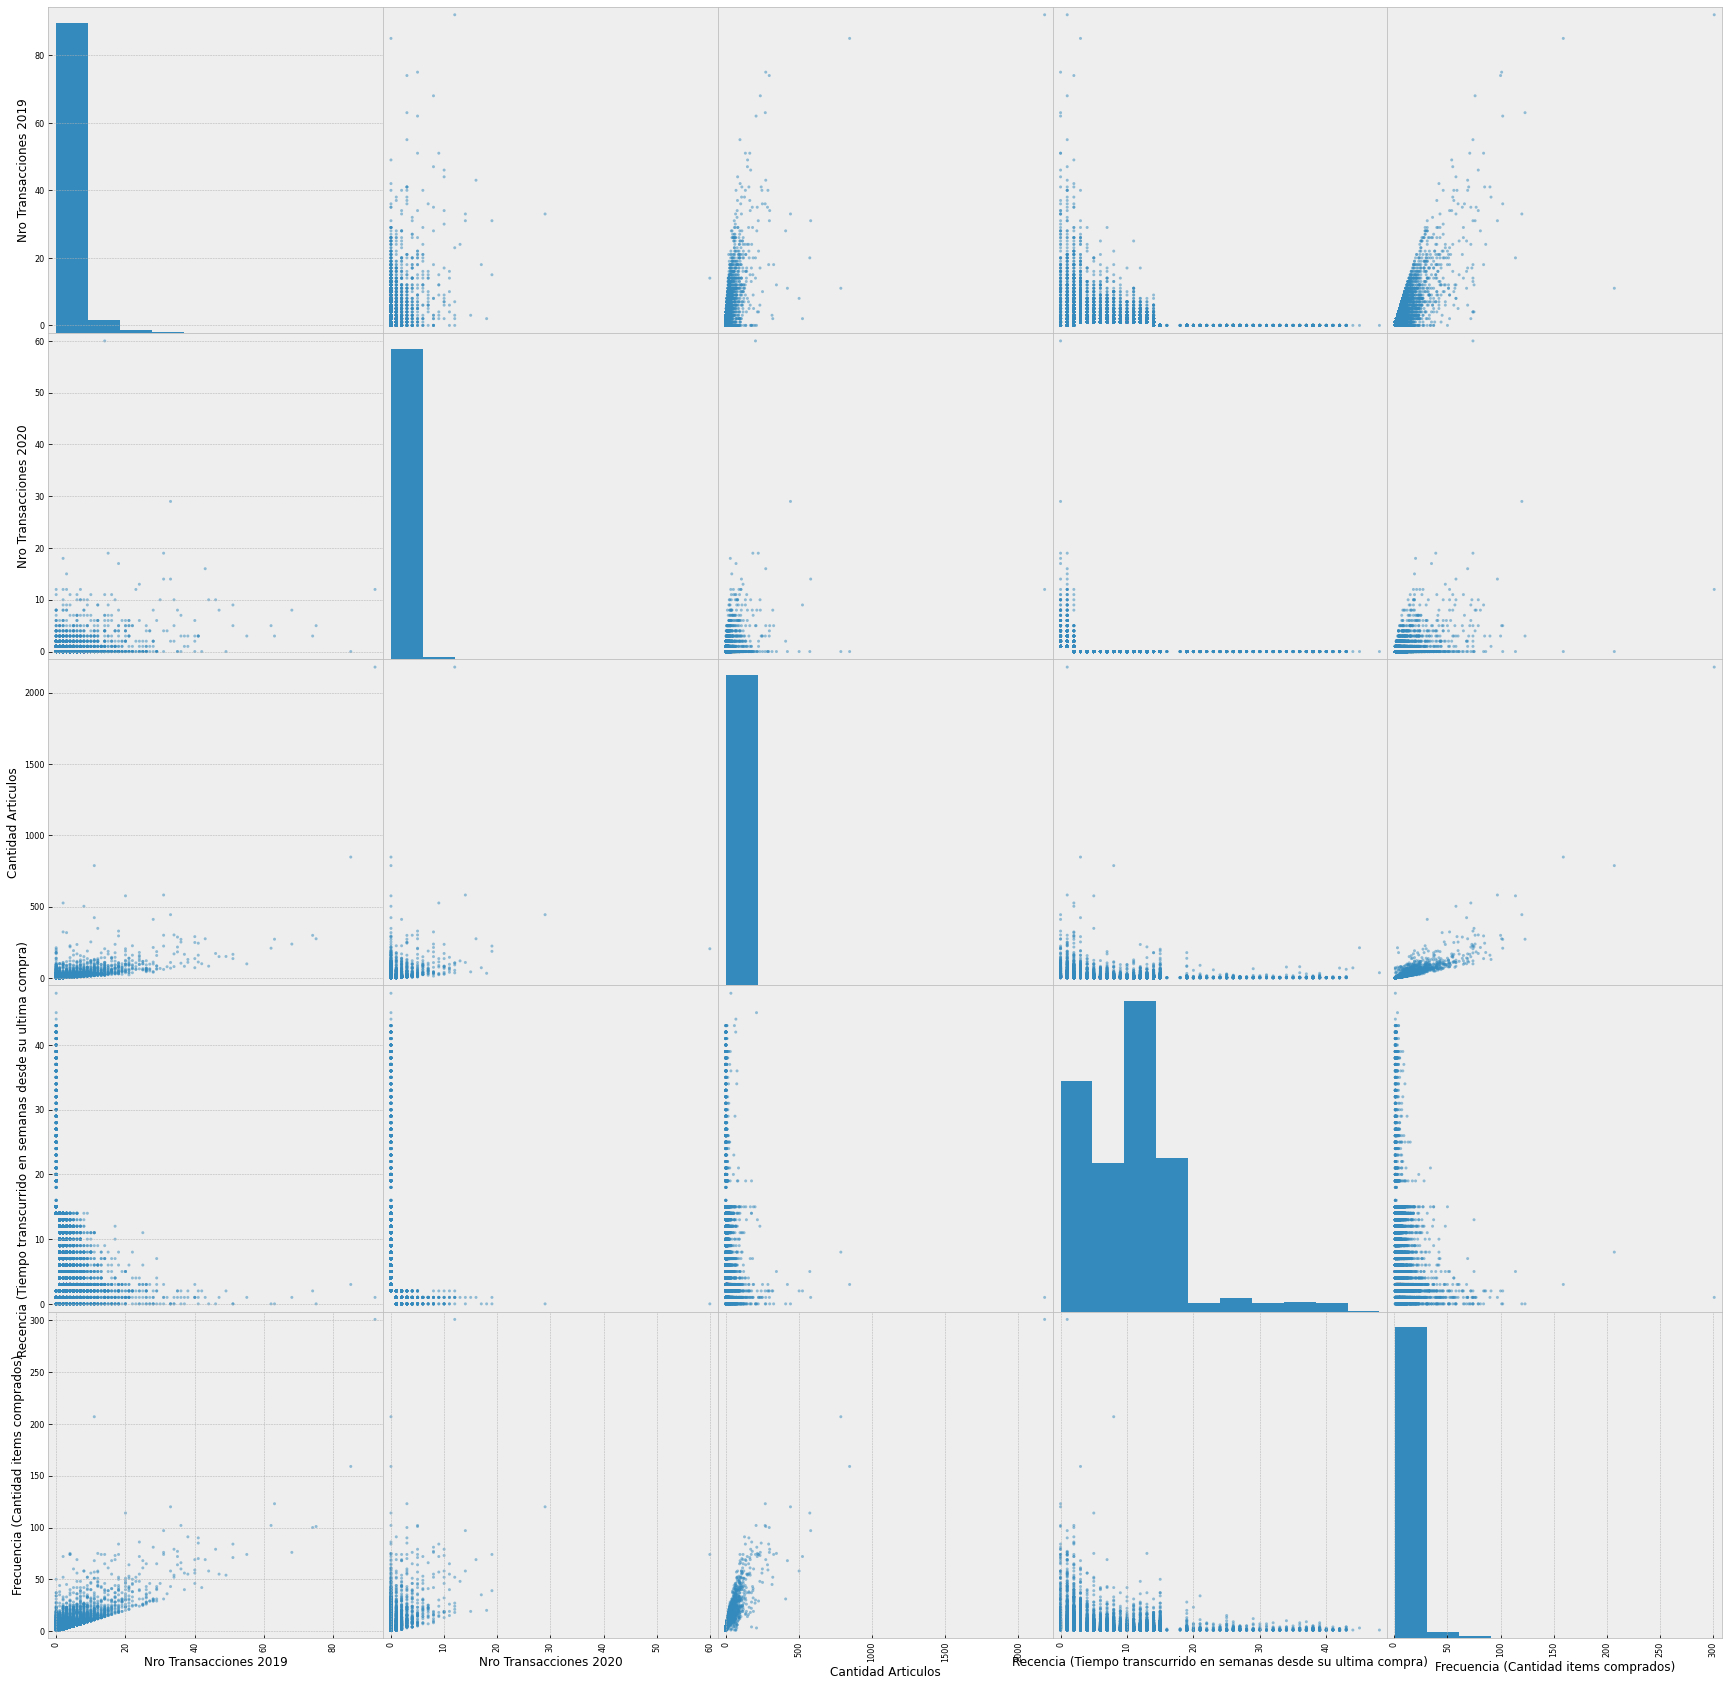

In [23]:
#explode = []

#for i in range(len(data["Genero"])):
    #explode.append(np.random.randn(i,1))
cols_plt = ['Nro Transacciones 2019','Nro Transacciones 2020','Cantidad Articulos',
           'Recencia (Tiempo transcurrido en semanas desde su ultima compra)',
           'Frecuencia (Cantidad items comprados)']
data1 =[]
for i in cols_plt:
    data1.append(data[i])

data2 = pd.DataFrame(data1)
    
pd.plotting.scatter_matrix(data2.T,figsize = (30, 30))


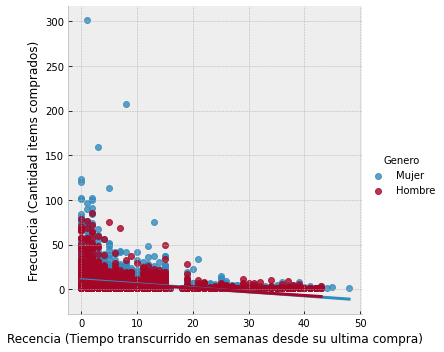

In [24]:
sns.lmplot(x='Recencia (Tiempo transcurrido en semanas desde su ultima compra)'
           , y='Frecuencia (Cantidad items comprados)'
           , hue='Genero',  data=data)

# Analisis Preliminar

Los anteriores procedimientos ayudan a adetecar la forma en como están organizados los datos. 
Las graficas dan una leve demostración de como se están comportando las variables y sus datos. 
Dado que hay datos que tiene poca información o que puede causar problemas por datos sospechosos se procede a hacer una limpieza de datos

# Modelo probabilísticos

"Es una representación matemática deducida de un conjunto de supuestos con el doble propósito de estudiar resultados de un experimento aleatorio y predecir su comportamiento futuro."

#  Modelo determinísticos

"Es donde las mismas entradas o condiciones iniciales producirán invariablemente las mismas salidas o resultados, no contemplándose la existencia de azar, o incertidumbre en el proceso modelado mediante dicho modelo."

La diferencias: los modelos determinísticos, da una buena decisión juzgada de acuerdo a los resultados. Sin embargo, en los modelos probabilísticos, el enfoque no es solamente por los resultados, sino que también con la cantidad de riesgo que cada decisión acarrea.


In [25]:
# Creo una copia del dataframe con la data inicial, tomando solo aquellas columnas que pueden ser de interés
# para entrenar un modelo de Machine Learning

data_new = data.drop(labels=['Nombre Completo', 'Mail', 'Direccion', 'Direccion Valido?', 'Cel Valido?',
                             'Tel Ofc Valid?', 'Tel Casa Valido?', 'Mail Valido?', 'Telefono Movil', 'TelefonoOficina', 
                             'Telefono Casa', 'Monto - Brand Store Cucuta', 'Es Contactable', 'Tipo de Contacto'], axis=1)

Se eliminan las variables que no generan valor en el data set

In [26]:
data_new['Estado Civil'].replace(np.nan, 'Sin información', inplace=True)
data_new['Estado Civil'].unique()

array(['No hay informacion', 'Soltero', 'Union Libre', 'Casado',
       'Divorciado', 'Viudo'], dtype=object)

En estado civil se encuentran muchos valores nan, se cree que no es indicado borrar esta infromación y se transforma y es reemplazado por Sin información.

In [27]:
data_new.isnull().sum()

Cedula                                                              0
Segmento                                                            0
Compro 2019?                                                        0
Compro 2020?                                                        0
Monto Comprado 2019?                                                0
Nro Transacciones 2019                                              0
Monto Comprado 2020                                                 0
Nro Transacciones 2020                                              0
Ciudad de Residencia                                                0
Genero                                                              0
Estado Civil                                                        0
Fecha Nacimiento                                                    0
Mes Nacimiento                                                      0
Dia Nacimiento                                                      0
Edad                

In [28]:
data_new.columns

Index(['Cedula', 'Segmento', 'Compro 2019?', 'Compro 2020?',
       'Monto Comprado 2019?', 'Nro Transacciones 2019', 'Monto Comprado 2020',
       'Nro Transacciones 2020', 'Ciudad de Residencia', 'Genero',
       'Estado Civil', 'Fecha Nacimiento', 'Mes Nacimiento', 'Dia Nacimiento',
       'Edad', 'Monto Total de ultima compra', 'Cantidad Articulos',
       'Recencia (Tiempo transcurrido en semanas desde su ultima compra)',
       'Frecuencia (Cantidad items comprados)',
       'Monto - MARCA COTTON- B/quilla.', 'Monto - MARCA COTTON- Bucaramanga',
       'Monto - MARCA COTTON- Manizales', 'Monto - MARCA COTTON- Pereira',
       'Monto - MARCA COTTON- Cartagena', 'Monto - MARCA COTTON- Pasto',
       'Monto - MARCA COTTON- Cable Plaza'],
      dtype='object')

In [29]:
data_new.shape

(9976, 26)

In [30]:
data_new.drop_duplicates(inplace=True)

In [31]:
data_new.shape

(9976, 26)

In [32]:
data_new.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.975]).T

,count,mean,std,min,1%,10%,20%,30%,40%,50%,60%,70%,80%,90%,97.5%,max
Cedula,9976.0,4.988500e+03,2.879967e+03,1.0,100.75,998.5,1996.0,2993.5,3991.0,4988.5,5986.0,6983.5,7981.0,8978.5,9.726625e+03,9976.0
Monto Comprado 2019?,9976.0,2.438670e+05,4.564346e+05,0.0,0.00,0.0,0.0,0.0,45900.0,113485.0,161820.0,235710.0,359730.0,637380.0,1.403162e+06,9231860.0
Nro Transacciones 2019,9976.0,2.462711e+00,4.698831e+00,0.0,0.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,4.0,6.0,1.400000e+01,92.0
Monto Comprado 2020,9976.0,2.506701e+04,1.322477e+05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.897775e+05,6448400.0
Nro Transacciones 2020,9976.0,2.635325e-01,1.287152e+00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000e+00,60.0
Fecha Nacimiento,9976.0,1.955487e+07,1.698869e+06,0.0,19000101.00,19001203.0,19630318.0,19700107.5,19750619.0,19790608.5,19820110.0,19840816.0,19870112.0,19900127.5,1.993048e+07,20001020.0
Dia Nacimiento,9976.0,1.510876e+01,9.083942e+00,1.0,1.00,2.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0,28.0,3.000000e+01,31.0
Edad,9976.0,4.036187e+01,2.602982e+01,10.0,16.00,21.0,24.0,26.0,29.0,31.0,35.0,40.0,47.0,110.0,1.110000e+02,111.0
Monto Total de ultima compra,9976.0,5.902064e+05,9.577543e+05,1900.0,45900.00,100320.0,134900.0,172800.0,226780.0,303700.0,400700.0,542525.0,800400.0,1296815.0,2.871486e+06,31004180.0
Cantidad Articulos,9976.0,1.196933e+01,3.655308e+01,1.0,1.00,1.0,1.0,2.0,3.0,4.0,6.0,8.0,13.0,25.0,7.600000e+01,2179.0


In [33]:
def createDummies(df, var_name): #entrar variables (Dataset,nombre de la variable)
    dummy = pd.get_dummies(df[var_name], prefix=var_name)#transforma valor a dummys
    df = df.drop(var_name, axis = 1)#elimina la variable
    df = pd.concat([df,dummy], axis = 1)#crea la variable 
    return df

Creo una función para convertir variables dummys a valores que pueda interpretar el modelo

In [34]:
data_new = createDummies(data_new,"Genero")

In [35]:
data_new = createDummies(data_new,"Compro 2019?")

In [36]:
data_new = createDummies(data_new,"Compro 2020?")

Uso la función para convertir estas variables a un valor que el modelo sepa interpretar

In [37]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 0 to 9975
Data columns (total 29 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Cedula                                                            9976 non-null   int64 
 1   Segmento                                                          9976 non-null   object
 2   Monto Comprado 2019?                                              9976 non-null   int64 
 3   Nro Transacciones 2019                                            9976 non-null   int64 
 4   Monto Comprado 2020                                               9976 non-null   int64 
 5   Nro Transacciones 2020                                            9976 non-null   int64 
 6   Ciudad de Residencia                                              9976 non-null   object
 7   Estado Civil                              

In [38]:
data_new["monto_total_2019"] = data_new["Monto Comprado 2019?"]*data_new["Nro Transacciones 2019"]


In [39]:
data_new["monto_total_2020"] = data_new["Monto Comprado 2020"]*data_new["Nro Transacciones 2020"]


In [40]:
data_new["monto_total"] = data_new["monto_total_2019"] + data_new["monto_total_2020"]
data_new.head()

,Cedula,Segmento,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Ciudad de Residencia,Estado Civil,Fecha Nacimiento,Mes Nacimiento,...,Monto - MARCA COTTON- Cable Plaza,Genero_Hombre,Genero_Mujer,Compro 2019?_No,Compro 2019?_Si,Compro 2020?_No,Compro 2020?_Si,monto_total_2019,monto_total_2020,monto_total
0,1,Aficionados,264800,2,0,0,BUCARAMANGA,No hay informacion,19000225,Febrero,...,0,0,1,0,1,1,0,529600,0,529600
1,2,Esporádicos,179900,1,0,0,BARRANQUILLA,No hay informacion,19561016,Octubre,...,0,1,0,0,1,1,0,179900,0,179900
2,3,Aficionados,189800,2,0,0,BARRANQUILLA,No hay informacion,19550707,Julio,...,0,0,1,0,1,1,0,379600,0,379600
3,4,Aficionados,65900,1,0,0,MANIZALES,No hay informacion,19620520,Mayo,...,1859600,0,1,0,1,1,0,65900,0,65900
4,5,Aficionados,238800,2,0,0,FLORIDABLANCA,No hay informacion,19660709,Julio,...,0,0,1,0,1,1,0,477600,0,477600


In [41]:
data_new["monto_x_ciudad"] = data_new["Monto - MARCA COTTON- B/quilla."] +data_new["Monto - MARCA COTTON- Bucaramanga"] + data_new["Monto - MARCA COTTON- Manizales"] + data_new["Monto - MARCA COTTON- Pereira"] + data_new["Monto - MARCA COTTON- Cartagena"] + data_new["Monto - MARCA COTTON- Pasto"] +data_new["Monto - MARCA COTTON- Cable Plaza"]

In [42]:
data_new.head()

,Cedula,Segmento,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Ciudad de Residencia,Estado Civil,Fecha Nacimiento,Mes Nacimiento,...,Genero_Hombre,Genero_Mujer,Compro 2019?_No,Compro 2019?_Si,Compro 2020?_No,Compro 2020?_Si,monto_total_2019,monto_total_2020,monto_total,monto_x_ciudad
0,1,Aficionados,264800,2,0,0,BUCARAMANGA,No hay informacion,19000225,Febrero,...,0,1,0,1,1,0,529600,0,529600,0
1,2,Esporádicos,179900,1,0,0,BARRANQUILLA,No hay informacion,19561016,Octubre,...,1,0,0,1,1,0,179900,0,179900,179900
2,3,Aficionados,189800,2,0,0,BARRANQUILLA,No hay informacion,19550707,Julio,...,0,1,0,1,1,0,379600,0,379600,451200
3,4,Aficionados,65900,1,0,0,MANIZALES,No hay informacion,19620520,Mayo,...,0,1,0,1,1,0,65900,0,65900,1859600
4,5,Aficionados,238800,2,0,0,FLORIDABLANCA,No hay informacion,19660709,Julio,...,0,1,0,1,1,0,477600,0,477600,0


Este procedimiento se hace para ver la diferencia entre montos y poder ver cual es el adecuado en el momento de hacer el modelo.

En el siguiete apartado se muestran las sumas de los diferentes montos

In [43]:
monto1 = sum(data_new["monto_total"])
print('El valor es: {:,.2f}'.format(monto1))

El valor es: 28,346,632,379.00


Este valor si suponemos que las transacciones no han sido añadidas al valor por compra por año. 

En caso de que este valor de las transacciones ya sea la del año total este sería el resultado

In [44]:
monto4 = sum(data_new["Monto Comprado 2019?"] + data_new["Monto Comprado 2020"])
print('El valor es: {:,.2f}'.format(monto4))

El valor es: 2,682,885,219.00


In [45]:
monto2 = sum(data_new["monto_x_ciudad"])
print('El valor es: {:,.2f}'.format(monto2))

El valor es: 1,903,608,294.00


In [46]:
monto3 = sum(data_new["Monto Total de ultima compra"])
print('El valor es: {:,.2f}'.format(monto3))

El valor es: 5,887,899,211.00


Podemos ver que los valores no se acercan a la variable monto total ultima compra.

* El monto total ultima compra recorre el historial de todas la compras hasta la ultima 

* El monto total ultima compra es la ultima compra hecha por cada cliente 

estas son las 2 posibilidades que hay con esta variable.  Pero al ver su alto valor se pretende usarla como valor total historico de compras por cliente.

El resto de variables se dejan por si en el modelo se quieren implementar medidas con años anteriores.

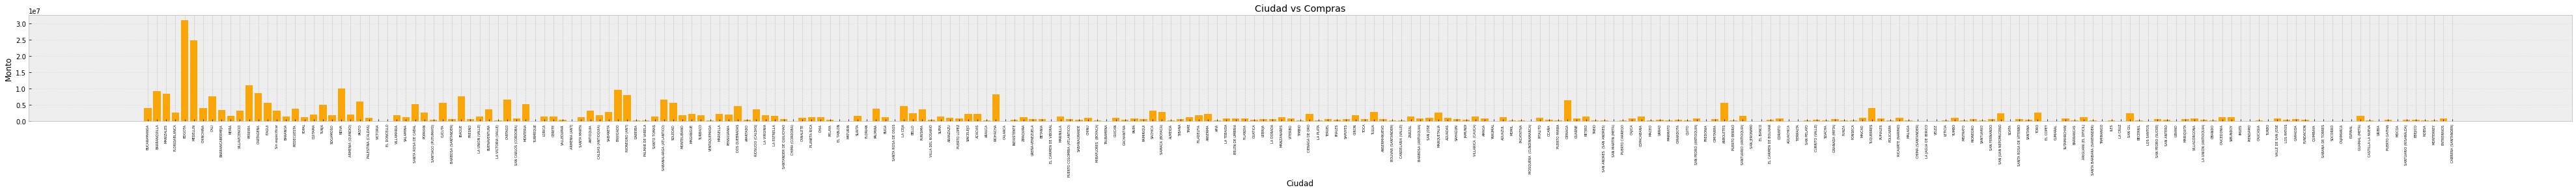

In [47]:
plt.figure(figsize=(70,3))
# Crea una figura de barras
plt.bar(x=data["Ciudad de Residencia"], height=data["Monto Total de ultima compra"], color='orange')

# Organizo las caracteristicas de la grafica 
plt.title('Ciudad vs Compras')
plt.xlabel('Ciudad')
plt.ylabel('Monto')
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.5, axis='y', alpha=0.2)
plt.xticks(rotation=90)
plt.xticks(fontsize=5)

# muestro la grafica
plt.show()

In [48]:
data_new["Monto Total de ultima compra"].describe()

count    9.976000e+03
mean     5.902064e+05
std      9.577543e+05
min      1.900000e+03
25%      1.548000e+05
50%      3.037000e+05
75%      6.525250e+05
max      3.100418e+07
Name: Monto Total de ultima compra, dtype: float64

In [49]:
data_new = data_new.drop(labels=['Fecha Nacimiento', 'Mes Nacimiento', 'Dia Nacimiento'], axis=1)


Elimino estas columnas porque no hay otras fechas con las cuales se pueda hacer una compración

No hay una fila que diga la fecha de compro o la fecha en la que se estan tomando los datos.

Por lo que la edad es suficiente para tener una idea de los datos de fecha de nacimiento. 

Los Outliers se dejan debido a que son datos que siempre van a estar presentes y es mejor darle un apartado ya que por lo general no son la mayoria. 

In [50]:
from sklearn.compose import make_column_transformer
data_new_col = make_column_transformer(
(OneHotEncoder(),["Estado Civil", "Segmento"]),
remainder="passthrough")

In [51]:
data_new_col.fit_transform(data_new) # otra forma de pasar los dummy a variables que sean interpretables

array([[0.0, 0.0, 1.0, ..., 0, 529600, 0],
       [0.0, 0.0, 1.0, ..., 0, 179900, 179900],
       [0.0, 0.0, 1.0, ..., 0, 379600, 451200],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 764880, 0],
       [0.0, 0.0, 1.0, ..., 0, 159920, 0],
       [0.0, 0.0, 1.0, ..., 0, 0, 0]], dtype=object)

In [52]:
data_new = createDummies(data_new,"Segmento")
data_new = createDummies(data_new,"Estado Civil")

In [53]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 0 to 9975
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Cedula                                                            9976 non-null   int64 
 1   Monto Comprado 2019?                                              9976 non-null   int64 
 2   Nro Transacciones 2019                                            9976 non-null   int64 
 3   Monto Comprado 2020                                               9976 non-null   int64 
 4   Nro Transacciones 2020                                            9976 non-null   int64 
 5   Ciudad de Residencia                                              9976 non-null   object
 6   Edad                                                              9976 non-null   int64 
 7   Monto Total de ultima compra              

In [54]:
ciudad_n = data_new["Ciudad de Residencia"]

d = {ni: indi for indi, ni in enumerate(set(ciudad_n))}#receta para asignar un número a cada valor único en una lista
numbers = [d[ni] for ni in ciudad_n]

In [55]:
data_new["ciudad_n"]=numbers 

En la primera línea, asigna un número a cada elemento único en su lista (almacenado en el diccionario d; puede crearlo fácilmente usando un diccionario de comprensión; set devuelve los elementos únicos de los nombres).

Luego, en la segunda línea, realiza una lista de comprensión y almacena los números reales en los números de la lista.

In [56]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 0 to 9975
Data columns (total 40 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Cedula                                                            9976 non-null   int64 
 1   Monto Comprado 2019?                                              9976 non-null   int64 
 2   Nro Transacciones 2019                                            9976 non-null   int64 
 3   Monto Comprado 2020                                               9976 non-null   int64 
 4   Nro Transacciones 2020                                            9976 non-null   int64 
 5   Ciudad de Residencia                                              9976 non-null   object
 6   Edad                                                              9976 non-null   int64 
 7   Monto Total de ultima compra              

In [57]:
data_new = data_new.drop(labels=['Ciudad de Residencia'], axis=1)

In [58]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Cedula,9976.0,4.988500e+03,2.879967e+03,1.0,2494.75,4988.5,7482.25,9976.0
Monto Comprado 2019?,9976.0,2.438670e+05,4.564346e+05,0.0,0.00,113485.0,288625.00,9231860.0
Nro Transacciones 2019,9976.0,2.462711e+00,4.698831e+00,0.0,0.00,1.0,3.00,92.0
Monto Comprado 2020,9976.0,2.506701e+04,1.322477e+05,0.0,0.00,0.0,0.00,6448400.0
Nro Transacciones 2020,9976.0,2.635325e-01,1.287152e+00,0.0,0.00,0.0,0.00,60.0
Edad,9976.0,4.036187e+01,2.602982e+01,10.0,25.00,31.0,44.00,111.0
Monto Total de ultima compra,9976.0,5.902064e+05,9.577543e+05,1900.0,154800.00,303700.0,652525.00,31004180.0
Cantidad Articulos,9976.0,1.196933e+01,3.655308e+01,1.0,1.00,4.0,10.00,2179.0
Recencia (Tiempo transcurrido en semanas desde su ultima compra),9976.0,1.042382e+01,7.298794e+00,0.0,4.00,12.0,14.00,48.0
Frecuencia (Cantidad items comprados),9976.0,5.775160e+00,9.595314e+00,1.0,1.00,3.0,6.00,301.0


# Modelo de Datos

Despues de haber hecho un procesamiento de datos. Se deja el dataset con datos númericos para que se puedan hacer diferentes modelos de machine learning y ver que resultados se pueden obtener.

In [59]:
X = data_new[["Monto Total de ultima compra","Cantidad Articulos",
             "Recencia (Tiempo transcurrido en semanas desde su ultima compra)","Frecuencia (Cantidad items comprados)"]]
Y = data_new[["Segmento_Adictos","Segmento_Aficionados","Segmento_Curiosos","Segmento_Esporádicos","Segmento_Inactivo"]]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [61]:
#se hace la prediccion con un randomForest
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train) #se entrena el modelo
print(rfc.score(X_test,y_test)) # se mustra el puntaje 
pred = rfc.predict([["300000","5","10","5"]])
pred1 = rfc.predict([["50000","2","30","2"]])
pred2 = rfc.predict([["6000000","20","1","7"]])
pred3 = rfc.predict([["1000000","10","15","10"]])
pred4 = rfc.predict([["70000","10","3","6"]])
print(pred)
print(pred1)
print(pred2)
print(pred3)
print(pred4)

0.9974949899799599
[[0 1 0 0 0]]
[[0 0 0 0 1]]
[[1 0 0 0 0]]
[[0 1 0 0 0]]
[[0 0 0 1 0]]


El modelo es capaz de detectar perfectamente cual es el segmento indicado en cada una de las predicciones.

para poder interpretar los datos de 0 y 1 de la matriz resultante se debe de saber el orden del segmento 

[Segmento_Adictos,Segmento_Aficionados,Segmento_Curiosos,Segmento_Esporádicos,Segmento_Inactivo]

Donde haya un 1 es porque el modelo detectó que pertenecia a esa segmento. 

los valores son valores random que se pueden cambiar y se hace una muestra de 5 para verificar que los rangos esten correctos

# Analisis de RFM

In [62]:
rfm_df = data_new[["Cedula","Recencia (Tiempo transcurrido en semanas desde su ultima compra)","Frecuencia (Cantidad items comprados)",
                     "Monto Total de ultima compra"
             ]]
rfm_df.head() # identifico los valores que me sirven para hacer el analsis 

,Cedula,Recencia (Tiempo transcurrido en semanas desde su ultima compra),Frecuencia (Cantidad items comprados),Monto Total de ultima compra
0,1,12,6,719400
1,2,12,1,179900
2,3,9,13,921700
3,4,2,17,2235300
4,5,3,5,362500


In [63]:
rfm_df['R_rank'] = rfm_df['Recencia (Tiempo transcurrido en semanas desde su ultima compra)'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frecuencia (Cantidad items comprados)'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monto Total de ultima compra'].rank(ascending=True)

# Normailizo el rango del cliente
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,Cedula,Recencia (Tiempo transcurrido en semanas desde su ultima compra),Frecuencia (Cantidad items comprados),Monto Total de ultima compra,R_rank_norm,F_rank_norm,M_rank_norm
0,1,12,6,719400,47.637956,73.862269,73.862269
1,2,12,1,179900,47.637956,13.527466,13.527466
2,3,9,13,921700,59.458359,90.296712,90.296712
3,4,2,17,2235300,89.207901,93.564555,93.564555
4,5,3,5,362500,82.014865,68.589615,68.589615


In [64]:
rfm_df['RFM_Valor'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Valor'] *= 0.05
rfm_df = rfm_df.round(2) 
rfm_df[['Cedula', 'RFM_Valor']].head(7)

,Cedula,RFM_Valor
0,1,3.50
1,2,0.93
2,3,4.28
3,4,4.65
4,5,3.53
5,6,2.84
6,7,1.64


La puntuación de RFM se calcula en función de la antigüedad, la frecuencia y el valor monetario normalizado. Sobre la base de esta puntuación dividimos a nuestros clientes. Aquí los calificamos en una escala de 5. La fórmula utilizada para calcular la puntuación de rfm es: 0,15*puntuación de actualidad + 0,28*puntuación de frecuencia + 0,57 *puntuación monetaria

In [65]:
rfm_df["Segmento_de_clientes"] = np.where(rfm_df['RFM_Valor'] >
                                      4.5, "Cliente TOP",
                                      (np.where(
                                        rfm_df['RFM_Valor'] > 4,
                                        "Cliente Valioso",
                                        (np.where(
    rfm_df['RFM_Valor'] > 3,
                             "Cliente Valor Medio",
                             np.where(rfm_df['RFM_Valor'] > 1.6,
                            'Cliente de poco Valor', 'Cliente perdido'))))))
rfm_df[['Cedula', 'RFM_Valor', 'Segmento_de_clientes']].head(5)

,Cedula,RFM_Valor,Segmento_de_clientes
0,1,3.50,Cliente Valor Medio
1,2,0.93,Cliente perdido
2,3,4.28,Cliente Valioso
3,4,4.65,Cliente TOP
4,5,3.53,Cliente Valor Medio


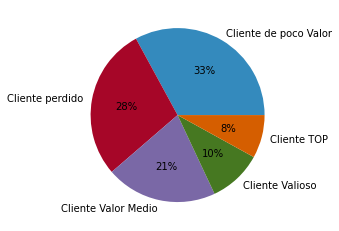

In [66]:
plt.pie(rfm_df.Segmento_de_clientes.value_counts(),
        labels=rfm_df.Segmento_de_clientes.value_counts().index,
        autopct='%.0f%%')
plt.show()

https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

Esta es la pagina de donde saque la infromación para poder hacer la segmetación por cliente y poder darle un valor

In [67]:
data_new = pd.concat([data_new, rfm_df[['RFM_Valor', 'Segmento_de_clientes']]], axis = 1)

In [68]:
data_new.head()

,Cedula,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Edad,Monto Total de ultima compra,Cantidad Articulos,Recencia (Tiempo transcurrido en semanas desde su ultima compra),Frecuencia (Cantidad items comprados),...,Segmento_Inactivo,Estado Civil_Casado,Estado Civil_Divorciado,Estado Civil_No hay informacion,Estado Civil_Soltero,Estado Civil_Union Libre,Estado Civil_Viudo,ciudad_n,RFM_Valor,Segmento_de_clientes
0,1,264800,2,0,0,111,719400,10,12,6,...,0,0,0,1,0,0,0,229,3.50,Cliente Valor Medio
1,2,179900,1,0,0,54,179900,1,12,1,...,0,0,0,1,0,0,0,193,0.93,Cliente perdido
2,3,189800,2,0,0,55,921700,25,9,13,...,0,0,0,1,0,0,0,193,4.28,Cliente Valioso
3,4,65900,1,0,0,48,2235300,50,2,17,...,0,0,0,1,0,0,0,198,4.65,Cliente TOP
4,5,238800,2,0,0,44,362500,8,3,5,...,0,0,0,1,0,0,0,22,3.53,Cliente Valor Medio


# Modelos implementados en Area Financiera

* Monitoreo Financiero
Los algoritmos de aprendizaje automático se pueden utilizar para mejorar significativamente la seguridad de la red. Los científicos de datos siempre están trabajando en sistemas de entrenamiento para detectar fraudes como el lavado de dinero, que pueden prevenirse mediante el monitoreo financiero. El futuro depara una gran posibilidad de que las tecnologías de aprendizaje automático potencien las redes de ciberseguridad más avanzadas.

* Predicciones de inversión
El hecho de que las tecnologías habilitadas para el aprendizaje automático brinden información avanzada del mercado permite a los administradores de fondos identificar cambios específicos del mercado mucho antes en comparación con los modelos de inversión tradicionales.
Con firmas de renombre como Bank of America, JPMorgan y Morgan Stanley invirtiendo fuertemente en tecnologías de ML para desarrollar asesores de inversión automatizados, la disrupción en la industria de la banca de inversión es bastante evidente.

* Automatización de procesos
Las soluciones impulsadas por Machine Learning permiten a las empresas financieras reemplazar por completo el trabajo manual mediante la automatización de tareas repetitivas a través de la automatización inteligente de procesos para mejorar la productividad empresarial. Los chatbots, la automatización del papeleo y la gamificación de la capacitación de los empleados son algunos de los ejemplos de automatización de procesos en finanzas utilizando el aprendizaje automático. Esto permite a las empresas financieras mejorar la experiencia de sus clientes, reducir costos y ampliar sus servicios.
Además, la tecnología de aprendizaje automático puede acceder fácilmente a los datos, interpretar comportamientos, seguir y reconocer patrones. Esto podría usarse fácilmente para los sistemas de atención al cliente que pueden funcionar de manera similar a un ser humano real y resolver todas las consultas únicas de los clientes.

* Transacciones seguras
Los algoritmos de aprendizaje automático son excelentes para detectar fraudes transaccionales al analizar millones de puntos de datos que tienden a pasar desapercibidos para los humanos. Además, ML también reduce la cantidad de falsos rechazos y ayuda a mejorar la precisión de las aprobaciones en tiempo real. Estos modelos generalmente se basan en el comportamiento del cliente en Internet y el historial de transacciones. Además de detectar comportamientos fraudulentos con alta precisión, la tecnología impulsada por ML también está equipada para identificar comportamientos de cuentas sospechosos y prevenir fraudes en tiempo real en lugar de detectarlos después de que ya se ha cometido el delito.

* Gestión de riesgos
Utilizando técnicas de aprendizaje automático, los bancos y las instituciones financieras pueden reducir significativamente los niveles de riesgo mediante el análisis de un volumen masivo de fuentes de datos. A diferencia de los métodos tradicionales, que generalmente se limitan a información esencial como el puntaje crediticio, ML puede analizar volúmenes significativos de información personal para reducir su riesgo.

* Comercio algorítmico
El aprendizaje automático en el comercio es otro excelente ejemplo de un caso de uso efectivo en la industria financiera. El comercio algorítmico (AT) se ha convertido, de hecho, en una fuerza dominante en los mercados financieros globales.
Las soluciones y modelos basados en ML permiten a las empresas comerciales tomar mejores decisiones comerciales al monitorear de cerca los resultados comerciales y las noticias en tiempo real para detectar patrones que pueden permitir que los precios de las acciones suban o bajen.

* Asesoría financiera
Hay varias aplicaciones de gestión presupuestaria impulsadas por el aprendizaje automático, que pueden ofrecer a los clientes el beneficio de asesoramiento y orientación financiera altamente especializados y específicos. Los algoritmos de aprendizaje automático no solo permiten a los clientes realizar un seguimiento de sus gastos a diario con estas aplicaciones, sino que también les ayudan a analizar estos datos para identificar sus patrones de gasto, seguido de la identificación de las áreas en las que pueden ahorrar.

* Márketing
La capacidad de los modelos de inteligencia artificial y aprendizaje automático para hacer predicciones precisas basadas en el comportamiento pasado los convierte en una excelente herramienta de marketing. Desde el análisis del uso de la aplicación móvil, la actividad web y las respuestas a campañas publicitarias anteriores, los algoritmos de aprendizaje automático pueden ayudar a crear una estrategia de marketing sólida para las empresas financieras.

## Modelos

https://weareadaptive.com/2021/03/18/machine-learning-models-in-finance/

<img src=https://weareadaptive.com/wp-content/uploads/2021/03/ML-methods.png>

# Identificar el funcionamiento y el uso de los modelos de fuga de clientes (churn)

La fuga de un cliente se refiere a cuando un usuario abandona la relación con una empresa. Este es uno de los principales problemas de las industrias, debido a que influye tanto en la pérdida directa de ingresos como los costos de marketing relacionados con el reemplazo de los clientes fugados por clientes nuevos, ya que es más difícil y costoso adquirir nuevos clientes que retenerlos.

Un modelo de fuga nos permite, a través de diferentes datos recolectados como la frecuencia de compras, el historial de pagos, el abandono de la compra, entre otros; conocer los motivos de abandono del cliente, siendo una herramienta muy funcional dentro de la implementación de una estrategia de omnicanalidad.

Según Price Waterhouse Coopers (PWC) en una encuesta realizada en Estados Unidos, aproximadamente el 59% de los usuarios abandonaron una marca después de varias malas experiencias, y el 17% después de una sola experiencia; lo que indica que los clientes más leales no toleran las malas experiencias. Estos tipos de fuga o rotación se dividen en voluntarios e involuntarios.

El diseño de un modelo de fuga comienza desde todo el conocimiento sobre los clientes. En esencia, las características demográficas de los clientes como el género, edad, ciudad de residencia, profesión, entre otros; permiten crear segmentos para un análisis más detallado.

Saber cuándo un cliente se registró, su frecuencia de compras, el historial de pagos, cuándo dejó de comprar, el valor total de por vida; nos ayuda a crear una imagen acerca de cómo estas variables impactan en abandono de los clientes.

El modelo de fuga nos permite segmentar a los usuarios que se pueden ir de la marca. Esto nos permite direccionar estrategias para retenerlos. Uno de esos métodos se llama omnicanalidad. Esta estrategia se basa en la integración de todos los canales para comunicar, vender y fidelizar a los clientes. Según Aspect Software, la omnicanalidad tiene tasas de retención de clientes año por año 91% más altas en comparación a los que no la implementan.
https://www.pragma.com.co/blog/que-es-un-modelo-de-fuga#:~:text=Un%20modelo%20de%20fuga%20nos,de%20una%20estrategia%20de%20omnicanalidad.

https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

Para este codigo se podría hacer una columna que se llame desertores que tenga como variable Si y No. 

* Se podría lograr con el tiempo transcurrido en semanas. se puede dejar un limite muy alto para decir que este ya es un desertor y decir que No vuelve a comprar y de lo contrario un Si. Ya con esto se puede sacar una predicción de que tan bien alineado va el negocio.

* Tambien con el valor de RFM, los valores que sean menores a los medios se puede decir que es un posible desertor y los mayores que no es desertor. 

https://randerson112358.medium.com/predict-customer-churn-using-python-machine-learning-b92f39685f4c

# Modelos de clasificación de datos

In [70]:
from math import pi

data_radar = data_new[["Segmento_de_clientes","RFM_Valor","Frecuencia (Cantidad items comprados)","Recencia (Tiempo transcurrido en semanas desde su ultima compra)","Cantidad Articulos"]]

In [71]:
data_radar.head(5)

,Segmento_de_clientes,RFM_Valor,Frecuencia (Cantidad items comprados),Recencia (Tiempo transcurrido en semanas desde su ultima compra),Cantidad Articulos
0,Cliente Valor Medio,3.50,6,12,10
1,Cliente perdido,0.93,1,12,1
2,Cliente Valioso,4.28,13,9,25
3,Cliente TOP,4.65,17,2,50
4,Cliente Valor Medio,3.53,5,3,8


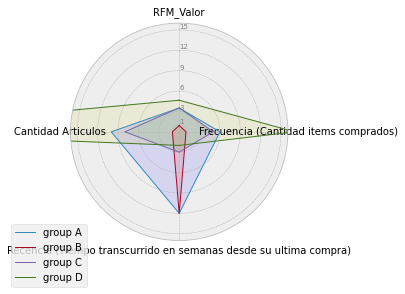

In [106]:
# Numero de variables 
categories=list(data_radar)[1:]
N = len(categories)

# ¿Cuál será el ángulo de cada eje en la gráfica? (dividimos la trama / número de variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# inicializa el plot de araña
ax = plt.subplot(111, polar=True)

# Si desea que el primer eje esté en la parte superior:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Dibuja un eje por variable + agrega etiquetas
plt.xticks(angles[:-1], categories)

# ylabels
ax.set_rlabel_position(0)
plt.yticks([1,3,6,9,12,15], ["1","3","6","9","12","15"], color="grey", size=7)
plt.ylim(0,16)

# Ind1
values=data_radar.loc[0].drop('Segmento_de_clientes').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=data_radar.loc[1].drop('Segmento_de_clientes').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=data_radar.loc[4].drop('Segmento_de_clientes').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group C")
ax.fill(angles, values, 'g', alpha=0.1)

# Ind4
values=data_radar.loc[3].drop('Segmento_de_clientes').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group D")
ax.fill(angles, values, 'y', alpha=0.1)

# leyenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# muestra el grafico
plt.show()

* El grupo A: Es un cliente que tiene caracteristicas de un largo periodo de tiempo pero que tiene alta capacidad para comprar articulos 
* El grupo B: muestra que los peridos de tiempo son largos y eso encarece los indices de compra. Dandole un bajo puntaje al RFM
* El grupo C: Este es parecido al grupo A pero lo diferencia que compra menos articulos pero pasa mayor tiempo de compras en el mercado
* El grupo D: Son altamente adictos a la compra y permanecer mucho tiempo en el establecimiento, obteniendo un mejor puntade de RFM que todos los anteriores. 

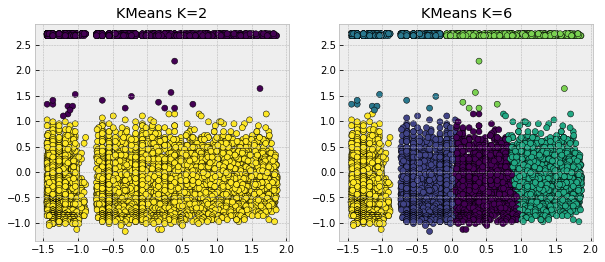

In [129]:
from sklearn.datasets import make_classification, make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

X = data_new[["RFM_Valor","Edad"]]
X_scaled = scale(X)

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

In [130]:
def silhouette_analysis(X):
    range_n_clusters = [2, 3, 4, 5, 6,8]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(19, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for %s clustering on sample data "
                      "with n_clusters = %d, score = %.3f" % (clusterer.__class__.__name__, n_clusters,silhouette_avg)),
                     fontsize=14, fontweight='bold')

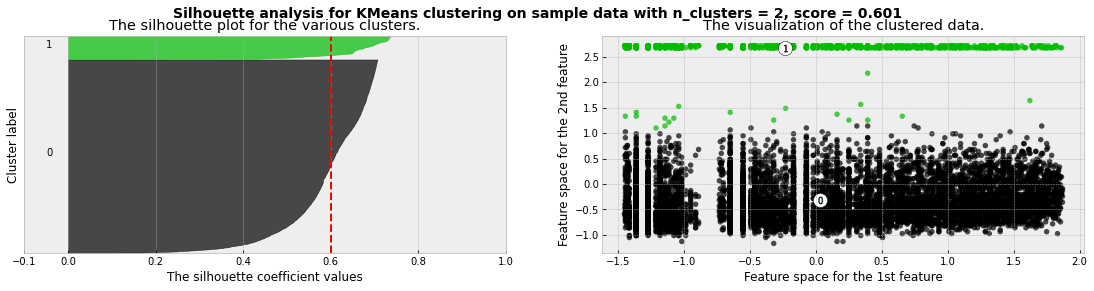

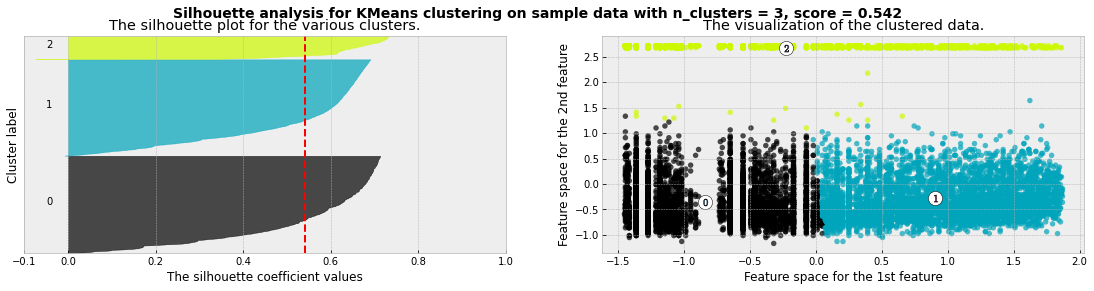

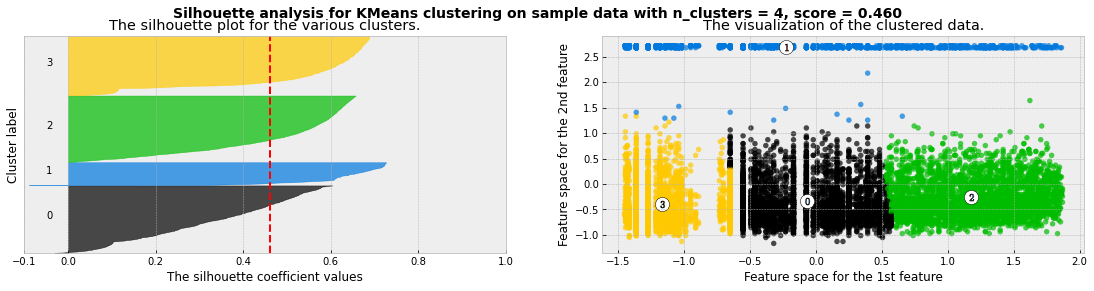

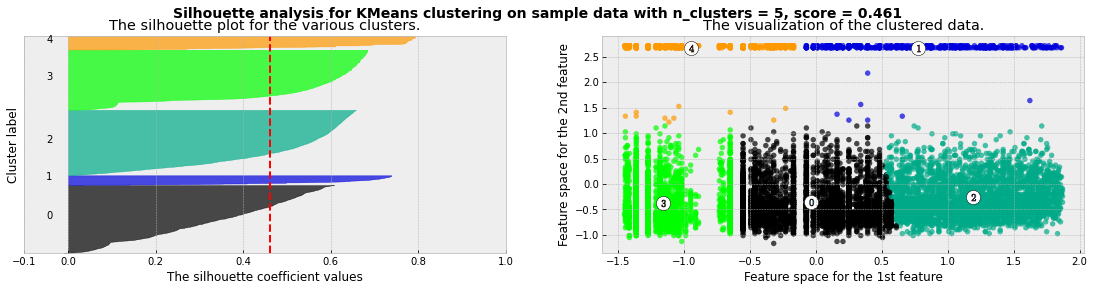

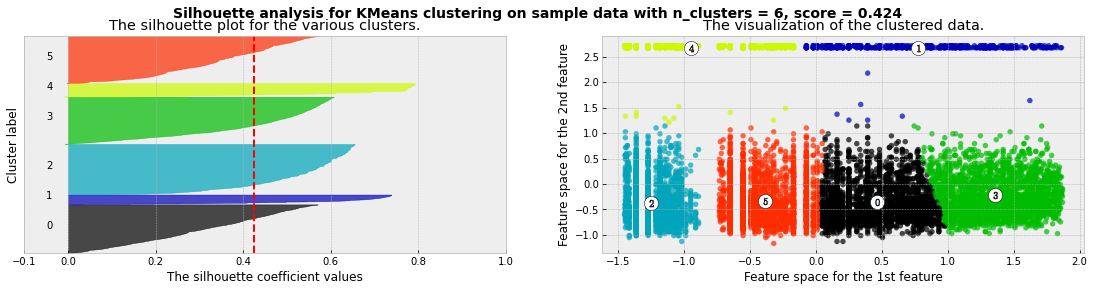

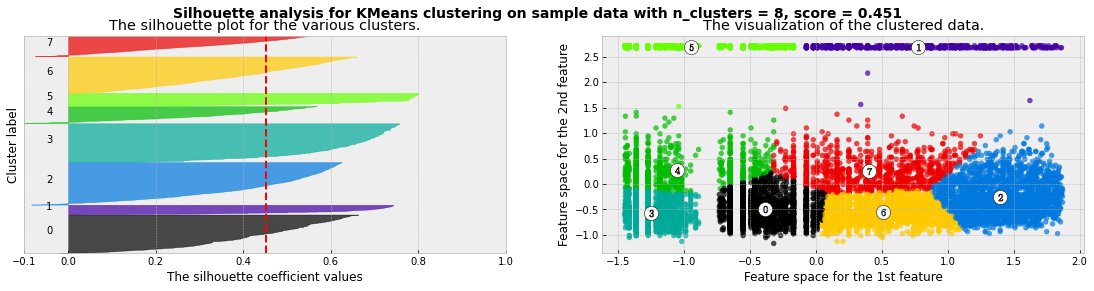

In [131]:
silhouette_analysis(X_scaled)

A pesar de no haber eliminado los datos de edad que estaban por fuera de las metricas, se logra distinguir a la hora de seleccionar los grupos, se demuestra que en la muestra de 2 poblaciones es la que mejor puntuación tiene. Esto quiere decir que si se le hubiera hecho un trato especial a la columna edades los resultados hubieran sido distintos y el algoritmo hubiera destacado otras agrupaciones.

# Modelos usados en la industria de Seguros

Detección de fraude

Ofertas personalizadas

Gestión de lapsos

Análisis de propiedades

Respondiendo a las consultas de los clientes

Mejorar la suscripción

* Gestión de caducidad: identifica las pólizas que probablemente caduquen y cómo acercarse al asegurado para mantener la póliza.

* Motor de recomendación: dados clientes similares, descubre dónde los asegurados individuales pueden tener demasiado o muy poco seguro. Luego, ayúdelos de manera proactiva a obtener el seguro adecuado para su situación actual.

* Asistente del asesor: una vez que un automóvil ha sido remolcado a un taller de carrocería, use la visión por computadora para ayudar al asesor a identificar los problemas que deben solucionarse. Esto ayuda a la precisión, acelera una evaluación y mantiene informado al cliente sobre cualquier reparación.

* Análisis de propiedades: dadas las imágenes de una propiedad, identifica estructuras en la propiedad y cualquier problema de condición. Las aseguradoras pueden ayudar de manera proactiva a los clientes a programar reparaciones al identificar problemas en sus techos o sugerir otra cobertura cuando se instalan nuevas estructuras, como una piscina.

* Detección de fraude: identifica reclamaciones que son potencialmente fraudulentas.

* Ofertas personalizadas: Mejora la experiencia del cliente al ofrecer información relevante sobre las coberturas que el asegurado puede necesitar en función de eventos de la vida, como el nacimiento de un hijo, la compra de una casa o un automóvil.

* Estudios de experiencia: utiliza el aprendizaje automático no supervisado para descubrir predictores en la actividad de reclamos. Esta información puede ayudar a establecer suposiciones y alimentar actividades tales como modelos de fijación de precios, análisis de riesgos y otros análisis actuariales.

* Entrenamiento escalado: use Azure para entrenar sus modelos usando GPU o miles de núcleos de CPU.

https://azure.microsoft.com/es-es/blog/eight-use-cases-for-machine-learning-in-insurance/

https://docs.microsoft.com/en-gb/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=mlins-acomblog-scseely
https://docs.microsoft.com/en-gb/previous-versions/azure/industry-marketing/financial/actuarial-risk-analysis-and-financial-modeling-solution-guide?WT.mc_id=mlins-acomblog-scseely

<img src=https://docs.microsoft.com/en-gb/azure/machine-learning/media/algorithm-cheat-sheet/machine-learning-algorithm-cheat-sheet.png>

# Analizar pasos requeridos para la industrialización de modelos

* Colectar Datos: Dada la problemática que deseas resolver, deberás investigar y obtener datos que utilizaras para alimentar a tu máquina. Importa mucho la calidad y cantidad de información que consigas ya que impactará directamente en lo bien o mal que luego funcione nuestro modelo. Puede que tengas la información en una base de datos ya existente o que la debas crear desde cero. Si es un pequeño proyecto puedes crear una planilla de cálculos que luego se exportará fácilmente como archivo csv. También es frecuente utilizar la técnica de web scraping para recopilar información de manera automática de diversas fuentes (y/o servicios rest/ APIs).

* Preparar los datos: Habrá que hacer Selección de Características, pues las que elijamos impactarán directamente en los tiempos de ejecución y en los resultados, también podremos hacer reducción de dimensiones aplicando PCA si fuera necesario. Deberemos tener balanceada la cantidad de datos que tenemos para cada resultado(clase), para que sea representativo, ya que si no, el aprendizaje podrá ser tendencioso hacia un tipo de respuesta y cuando nuestro modelo intente generalizar el conocimiento fallará.También deberemos separar los datos en en dos grupos: uno para entrenamiento y otro para evaluación del modelo.

* Elegir el modelo: Existen diversos modelos que podemos elegir de acuerdo al objetivo que tengamos: utilizaremos algoritmos de clasificación, predicción, regresión lineal, clustering (ejemplo k-means ó k-nearest neighbor),  Deep Learning (ej: red neuronal), bayesiano, etc y podrá haber variantes si lo que vamos a procesar son imágenes, sonido, texto, valores numéricos.

* Entrenar nuestra máquina: Utilizaremos el set de datos de entrenamiento para ejecutar nuestra máquina y deberemos de ver una mejora incremental (para la predicción). Recordar inicializar los “pesos” de nuestro modelo aleatoriamente, los pesos son los valores que multiplican o afectan a las relaciones entre las entradas y las salidas, se irán ajustando automáticamente por el algoritmo seleccionado cuanto más se entrena. Revisar los resultados obtenidos y corregir (por ej. inclinación de la pendiente)

* Evaluación: Deberemos comprobar la máquina creada contra nuestro set de datos de Evaluación que contiene entradas que el modelo desconoce y verificar la precisión de nuestro modelo ya entrenado. Si la exactitud es menor o igual al 50% ese modelo no será útil ya que sería como lanzar una moneda al aire para tomar decisiones. Si alcanzamos un 90% o más podremos tener una buena confianza en los resultados que nos otorga el modelo.

* Configuración de parámetros: Si durante la evaluación no obtuvimos buenas predicciones y nuestra precisión no es la mínima deseada es posible que tengamos problemas de overfitting (ó underfitting) y deberemos retornar al paso de entrenamiento (4) haciendo antes una nueva configuración de parámetros de nuestro modelo. Podemos incrementar la cantidad de veces que iteramos nuestros datos de entrenamiento (EPOCHs). Otro parámetro importante es el conocido como “Learning Rate” (taza de aprendizaje) que suele ser un valor que multiplica al gradiente para acercarlo poco a poco al mínimo global (o local) para minimizar el coste de la función. No es lo mismo incrementar nuestros valores en 0,1 unidades que de 0,001 esto puede afectar significativamente el tiempo de ejecución del modelo. Tambié se puede indicar el máximo error permitido de nuestro modelo. Podemos pasar de tardar unos minutos a horas (y días) en entrenar nuestra máquina. A estos parámetros muchas veces se les llama Hiperparámetros. Este “tuneo” sigue siendo más un arte que una ciencia y se ira mejorando a medida que experimentamos. Suele haber muchos parámetros para ir ajustando y al combinarlos se pueden disparar todas nuestras opciones. Cada algoritmo tiene sus propios parámetros a ajustar. Por nombrar alguno más, en las Redes Neuronales Artificiales deberemos definir en su arquitectura la cantidad de hidden layers que tendrá e ir probando con más o con menos y con cuantas neuronas cada capa. Este será un trabajo de gran esfuerzo y paciencia para dar con buenos resultados.

* Predicción o Inferencia: Ya estamos listos para utilizar nuestro modelo de Aprendizaje Automático! con nueva información y comenzar a predecir o inferir resultados


<img src=https://d2908q01vomqb2.cloudfront.net/d435a6cdd786300dff204ee7c2ef942d3e9034e2/2021/01/18/blog20_image001.jpg>

https://aws.amazon.com/es/blogs/aws-spanish/supervision-de-modelos-ml-en-produccion-a-gran-escala-con-amazon-sagemaker-model-monitor/